In [1]:
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from scipy import stats
import sympy as sym
from IPython.display import display, Image

plt.rcParams['figure.figsize'] = (15, 5)


# Rare-event simulation
## Lecture 4
### Patrick Laub, Institut de Science Financière et d’Assurances

## Agenda

- Finish MCMC explanation
- Talk a little about the exam
- Quiz session
- Audience suggested lecture on machine learning

## Markov property

__Markov chains taking real values__: Discrete time process $(X_n)_{n \ge 0}$ where $X_n \in \mathbb{R}$), with the _Markov property_:

$$ \mathbb{P}(X_n \le x \mid X_0 = x_0, X_1 = x_1, \dots, X_{n-1} = x_{n-1}) = \mathbb{P}(X_n \le x \mid X_{n-1} = x_{n-1})$$

for $x \in \mathbb{R}$. 

__Markov chains taking vector values__:

Discrete time process $(\mathbf{X}_n)_{n \ge 0}$, where the process takes values inside a state space $\mathbf{X}_n \in \mathbb{R}^n$, with the _Markov property_:

$$ \mathbb{P}(\mathbf{X}_n \in A \mid \mathbf{X}_0 = \mathbf{x}_0, \mathbf{X}_1 = \mathbf{x}_1, \dots, \mathbf{X}_{n-1} = \mathbf{x}_{n-1}) =  \mathbb{P}(\mathbf{X}_n \in A \mid \mathbf{X}_{n-1} = \mathbf{x}_{n-1})$$

for $A \in \mathcal{B}(\mathbb{R}^n)$. 

__Simplify notation__: Write the chain as $X_1, X_2,\dots$ even if they are vector-valued. Say that they take values inside the _state space_ $\mathcal{S}$ which can either be $\mathbb{R}$ or $\mathbb{R}^n$ or something else.

## Transition kernel

Say $p(y \mid x)$ is the MC's _transition kernel_, which gives the density of proposing a jump to $y$ given we're currently at $x$. Specifically, 

$$ f_{X_{i} \mid X_{i-1}}(y \mid x) = \mathbb{P}(X_i \in [y + \mathrm{d}y] \mid X_{i-1}=x) = p(y \mid x) .$$

So, for every $x$, then $\int_{\mathcal{S}} p(y \mid x) \, \mathrm{d}y = 1$ .

## Stationary distributions

Some MCs have a stationary distribution, $\pi(\,\cdot\,)$, so if

$$ X_0 \sim \pi(\,\cdot\,) \quad\Rightarrow\quad X_1 \sim \pi(\,\cdot\,) \quad\Rightarrow\quad X_2 \sim \pi(\,\cdot\,) \dots $$

To be specific, if we have a MC with transition kernel $p(y \mid x)$ and which takes values in $\mathcal{S}$, 

$$ 
\begin{aligned}
f_{X_1}(x_1) 
&= \int_{x_0 \in \mathcal{S}} f_{X_0,X_1}(x_0, x_1) \, \mathrm{d} x_0
= \int_{x_0 \in \mathcal{S}} f_{X_0}(x_0) f_{X_1 \mid X_0}(x_1 \mid x_0)  \, \mathrm{d} x_0 \\
&= \int_{x_0 \in \mathcal{S}} f_{X_0}(x_0) p(x_1 \mid x_0) \, \mathrm{d} x_0 .
\end{aligned}
$$

If $X_0$ has p.d.f. $f_{X_0}(x_0) = \pi(x_0)$ and 

$$ f_{X_1}(x_1)
= \int_{x_0 \in \mathcal{S}} \pi(x_0) p(x_1 \mid x_0) \, \mathrm{d} x_0
= \pi(x_1)
$$

then $\pi$ is a stationary distribution.

## Limiting distributions

Some MCs have a limiting distribution, that is, for all starting positions $x_0 \in \mathbb{R}$ as $n \to \infty$

$$ (X_n \mid X_0 = x_0) \overset{\mathcal{D}}{\longrightarrow} \, \pi(\,\cdot\,) .$$

Written another way,

$$ \lim_{n \to \infty} f_{X_n \mid X_0}(x \mid x_0) = \pi(x) .$$


The limiting distribution $\pi$ is the stationary distribution.

So, if we want to simulate from $\pi$, just start $X_0$ anywhere and run the MC for _a while_, then after $N \approx \infty$ steps we have

$$ X_{N} \overset{\mathrm{approx.}}{\sim} \pi(\,\cdot\,) \quad\Rightarrow\quad X_{N+1} \overset{\mathrm{approx.}}{\sim} \pi(\,\cdot\,) \quad\Rightarrow\quad X_{N+2} \overset{\mathrm{approx.}}{\sim} \pi(\,\cdot\,) \dots$$

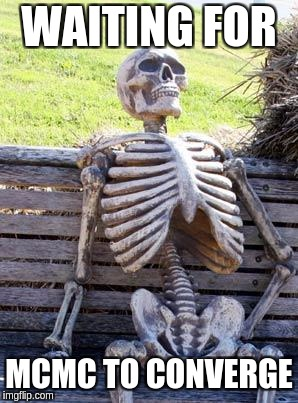

In [5]:
Image("waiting-mcmc-to-converge.jpg")

## Why does this work? Why is this $\alpha(X,Y)$ so special?

The secret relates to the fact that $\alpha$ makes the chain _reversible_ with respect to the target density $f_X$.

A Markov chain with transition probability $p(y \mid x)$ is _reversible_ with respect to a density $g$ if

$$ g(x) p(y \mid x) = g(y) p(x \mid y) $$

for all $x,y \in \mathcal{S}$. These are called the _detailed balance equations_.

This next part is a bit complicated:
- Not every MC has a stationary distribution
- For MC's which have a stationary distribution, not all are reversible w.r.t. their stationary distribution
- __But__ for MC's which are reversible w.r.t. some distribution $g$, then $g$ must be a stationary distribution for the MC.

## Proof that reversibility implies stationarity


Want to show that if a MC is reversible w.r.t. some distribution $g$, i.e.

$$ g(x) p(y \mid x) = g(y) p(x \mid y)$$

then $g$ must be a stationary distribution for the MC, i.e. $X_0 \sim g \Rightarrow X_1 \sim g$.

__Proof:__

$$
\begin{aligned}
f_{X_1}(x_1)
&= \int_{x_0 \in \mathcal{S}} f_{X_0}(x_0) p(x_1 \mid x_0) \, \mathrm{d} x_0
= \int_{x_0 \in \mathcal{S}} g(x_0) p(x_1 \mid x_0) \, \mathrm{d} x_0 \\
&= \int_{x_0 \in \mathcal{S}} g(x_1) p(x_0 \mid x_1) \, \mathrm{d} x_0
= g(x_1) \int_{x_0 \in \mathcal{S}} p(x_0 \mid x_1) \, \mathrm{d} x_0
= g(x_1) .
\end{aligned}
$$

## We want $f_X$ as stationary distribution, so enforce reversibility w.r.t. $f_X$

First, what is the transition kernel for the MCMC chain? Is it $q(y \mid x)$? __No__.

For $y\not=x$ it is

$$ p(y \mid x) = q(y \mid x) \alpha(x, y) $$

and if $y = x$ it is

$$ p(y \mid x) = \int_\mathcal{S} q(z \mid x) [1 - \alpha(x, z)] \,\mathrm{d}z $$

However, proposing points using $q(y \mid x)$ __does__ make the chain reversible w.r.t. the target density $f_X$.

## Proof that $q(y \mid x)$ makes the chain reversible w.r.t. target density $f_X$

Remember, for $x \not= y$ we have $p(y \mid x) = q(y \mid x) \alpha(x, y) $ and

$$ \alpha(x, y) = \min\bigl\{  \frac{ f_X(y) \, q(x \mid y) 
}{ f_X(x) \, q(y \mid x) } , 1 \bigr\} \quad \text{and} \quad \alpha(y, x) = \min\bigl\{  \frac{ f_X(x) \, q(y \mid x) 
}{ f_X(y) \, q(x \mid y) } , 1 \bigr\} . $$

Do we have $ f_X(x) p(y \mid x) = f_X(y) p(x \mid y)$? If $x = y$, then obviously yes. For $x \not=y$

$$ \begin{aligned}
f_X(x) p(y \mid x) 
&= f_X(x) q(y \mid x) \alpha(x, y) \\
&= f_X(x) q(y \mid x) \min\bigl\{  \frac{ f_X(y) \, q(x \mid y) 
}{ f_X(x) \, q(y \mid x) } , 1 \bigr\} \\
&= \min\bigl\{ f_X(y) \, q(x \mid y) 
, f_X(x) q(y \mid x)  \bigr\} \times \frac{f_X(y) \, q(x \mid y) }{f_X(y) \, q(x \mid y) } \\
&= f_X(y) \, q(x \mid y)  \min\bigl\{ 1, \frac{ f_X(x) q(y \mid x) }{f_X(y) \, q(x \mid y) }  \bigr\}  \\
&= f_X(y) \, q(x \mid y) \, \alpha(y, x) = f_X(y) \, p(x \mid y) .
\end{aligned} $$

## Congratulations, you now have god-like statistical powers

$\DeclareMathOperator*{\argmax}{arg\,max}$
Say that we have data $\mathbf{x} = \{x_1,\dots,x_n\}$ and want to fit an $\mathsf{Exponential}(\lambda)$ distribution to it.

__Frequentist approach__: Find $\lambda^* = \argmax_\lambda \prod_{i=1}^n f(x_i, \lambda) $. Result is _one number_.



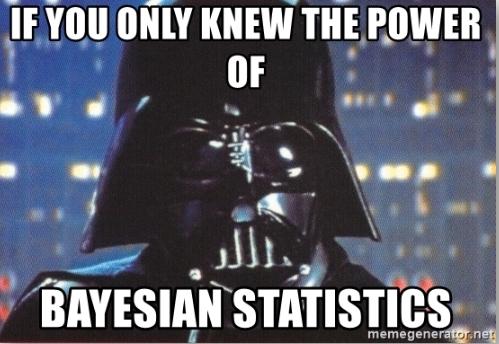

In [4]:
Image("vader.png")


__Bayesian modelling__: Treat $\lambda$ as a random variable. First guess for it's value is $\lambda \sim \mathsf{Pareto}(\alpha)$, the _prior distribution_. After seeing the data we get a more accurate estimate for the distribution of $\lambda$, the _posterior distribution_.

$$ \begin{aligned}
f(\lambda \mid \mathbf{x}) 
&= \frac{ f(\mathbf{x} \mid \lambda) f(\lambda) }{ \int f(\mathbf{x} \mid \lambda) f(\lambda) \mathrm{d}\lambda }
\propto f(\mathbf{x} \mid \lambda) f(\lambda) \\
&\propto \bigl( \prod_{i=1}^n \lambda \mathrm{e}^{-\lambda x_i} \bigr)  \lambda^{ -(\alpha+1) } 
= \lambda^{n-\alpha-1} \exp \bigl( -\lambda \sum_{i=1}^n x_i  \bigr)  .
\end{aligned}
$$

In [4]:
%%R
library(ks)

run_mcmc <- function(R, logF, start) {
    burnIn <- 5000
    Rbig <- burnIn + R
    
    jumpLambda <- 10
    Xstart <- start
    Xs <- rep(NA, Rbig)

    Xs[1] <- Xstart

    for (r in 2:Rbig) {
        U1 <- (runif(1) < 0.5)
        Y <- Xs[r-1] + (-1)^U1 * rexp(1, jumpLambda)
        
        if (log(runif(1)) < logF(Y) - logF(Xs[r-1])) {
            Xs[r] <- Y
        } else {
            Xs[r] <- Xs[r-1]
        }
    }
    return(Xs[-(1:burnIn)])
}

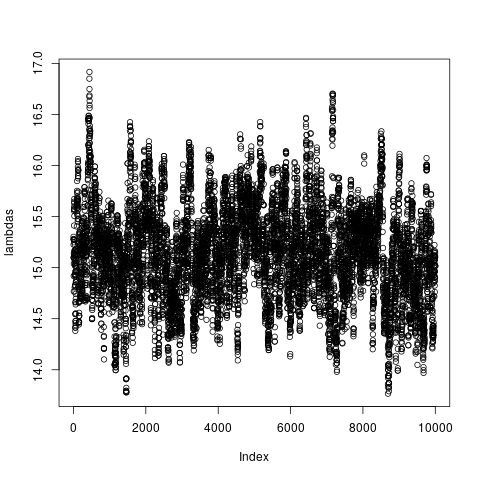

In [6]:
%%R 
set.seed(1337)
trueLambda <- 15
n <- 1000; xs <- rexp(n, trueLambda)
alpha <- -1

# Frequentist approach
lambdaPointEstimate <- 1/mean(xs)
# Bayesian way
targetLogF <- function(lambda) {
    (n-alpha-1)*log(lambda) -lambda * sum(xs)
}

lambdas <- run_mcmc(R <- 10^4, targetLogF, 10)
plot(lambdas)

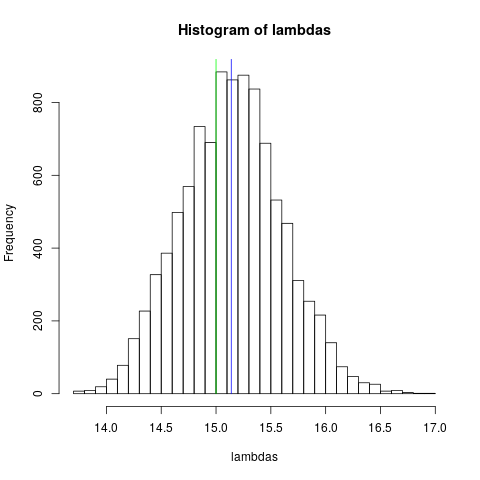

In [11]:
%%R
hist(lambdas, 40)
lines(c(trueLambda, trueLambda), c(0, 1e6), col="green")
lines(c(lambdaPointEstimate, lambdaPointEstimate), c(0, 1e6), col="blue")

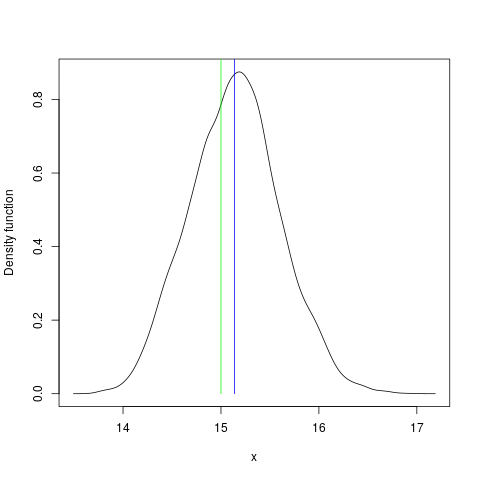

In [10]:
%%R
plot(kde(lambdas))
lines(c(trueLambda, trueLambda), c(0, 1e6), col="green")
lines(c(lambdaPointEstimate, lambdaPointEstimate), c(0, 1e6), col="blue")

# Some machine learning

Two main fields:

- _Supervised learning_: have $( (\mathbf{x}^{[1]}, \mathbf{y}^{[1]}), \dots, (\mathbf{x}^{[n]}, \mathbf{y}^{[n]}) )$ and want to find the function $f(\mathbf{x}) = \mathbf{y}$ for all possible $\mathbf{x}$.
    - If $\mathbf{y}$ is continuous (e.g. predicted house prices) this is a _regression problem_.
    - If $\mathbf{y}$ is categorical (e.g. will this credit application be a bad risk, yes/no) then it is a _classification problem_.

- _Unsupervised learning_: just have $(\mathbf{x}^{[1]}, \dots, \mathbf{x}^{[n]})$ and want to find clusters inside them.

## Ancient technology: clustering with $k$-means

_Inputs_: data $(\mathbf{x}^{[1]}, \dots, \mathbf{x}^{[n]})$, where $\mathbf{x}^{[i]} \in \mathbb{R}^m$ and $K$ number of clusters to find.

Randomly choose $K$ points (without repetition) and call them $\mathbf{c}^{[1]}, \dots, \mathbf{c}^{[K]}$  
For $\mathrm{iteration} = 1, \dots, \mathrm{MaxIterations}$:  
$\quad$ Calculate the distance from all $\mathbf{x}^{[i]}$'s to each $\mathbf{c}^{[j]}$'s. E.g. $\mathbf{D} = (D_{ij}) \in \mathbb{R}^{n \times K}$ where

$$ D_{i,j} = d(\mathbf{x}^{[i]}, \mathbf{c}^{[j]}) \quad \text{for } i=1,\dots,n \text{ and } j=1,\dots,K$$

$\quad$ Assign each point $\mathbf{x}^{[i]}$ to the closest $\mathbf{c}^{[k]}$. I.e.

$$ \DeclareMathOperator*{\argmin}{arg\,min}
\mathcal{P}(i) = \argmin_{k} d(\mathbf{x}^{[i]}, \mathbf{c}^{[k]}) = \argmin_k D_{ik} \quad \text{for } i=1,\dots,n$$

$\quad$ So, for each cluster $\mathcal{C}(k) = \{ i : \mathcal{P}(i) = k \}$, update the cluster center

$$ \mathbf{c}^{[k]} = \frac{1}{|\mathcal{C}(k)|} \sum_{i \in \mathcal{C}(k)} \mathbf{x}^{[i]} $$


## An example: mixture of bivariate normals

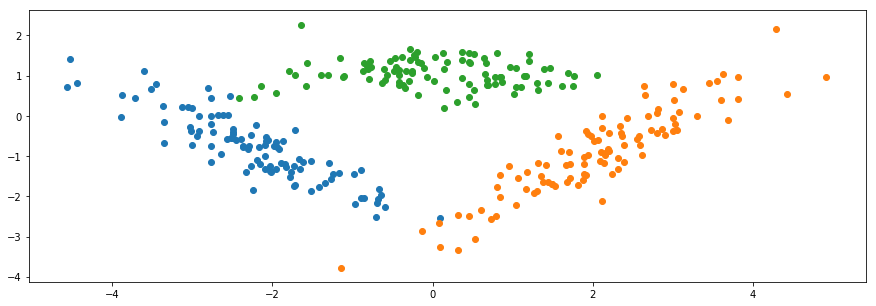

In [3]:
rnd.seed(1)
X1s = stats.multivariate_normal([-2,-1], [[1, -0.9], [-0.9,1]]).rvs(100)
X2s = stats.multivariate_normal([2,-1], [[1, 0.9], [0.9,1]]).rvs(100)
X3s = stats.multivariate_normal([0,1], [[1, 0], [0,0.1]]).rvs(100)

plt.scatter(X1s[:,0], X1s[:,1])
plt.scatter(X2s[:,0], X2s[:,1])
plt.scatter(X3s[:,0], X3s[:,1]);

## This is what the algorithm sees

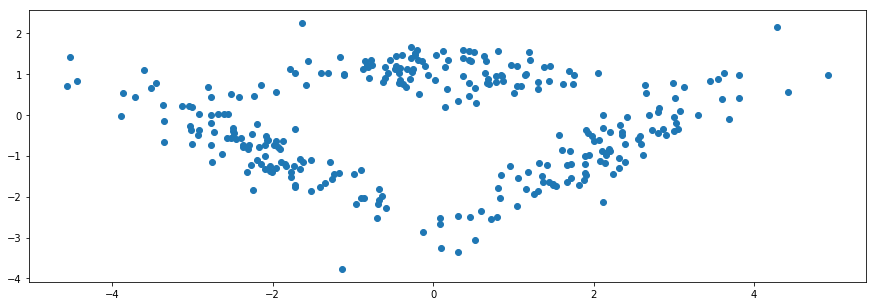

In [4]:
Xs = np.concatenate([X1s,X2s,X3s])
plt.scatter(Xs[:,0], Xs[:,1]);

## Run $k$-means

In [11]:
from ipywidgets import interact_manual
from numpy.linalg import norm

rnd.seed(1337)
K = 3; n = Xs.shape[0]

clusterInds = rnd.choice(n, K)
Cs = Xs[clusterInds,:]
    
def update():
    global Cs, firstIter

    # Assign the points to their nearest cluster centre.
    D = [[norm(Xs[i,:] - Cs[k,:]) for k in range(K)] for i in range(n)]
    P = np.argmin(np.array(D), axis=1)
   
    # Plot the current clusters
    plt.figure(2)
    for k in range(K):
        plt.scatter(Xs[P==k,0], Xs[P==k,1], marker="*")
    plt.scatter(Cs[:,0], Cs[:,1])
    plt.show()
    
    # Update the cluster center points.
    for k in range(K):
        Cs[k,:] = np.mean(Xs[P==k,:], axis=0)

In [8]:
interact_manual(update);

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

## Supervised learning: it all boils down to function approximation

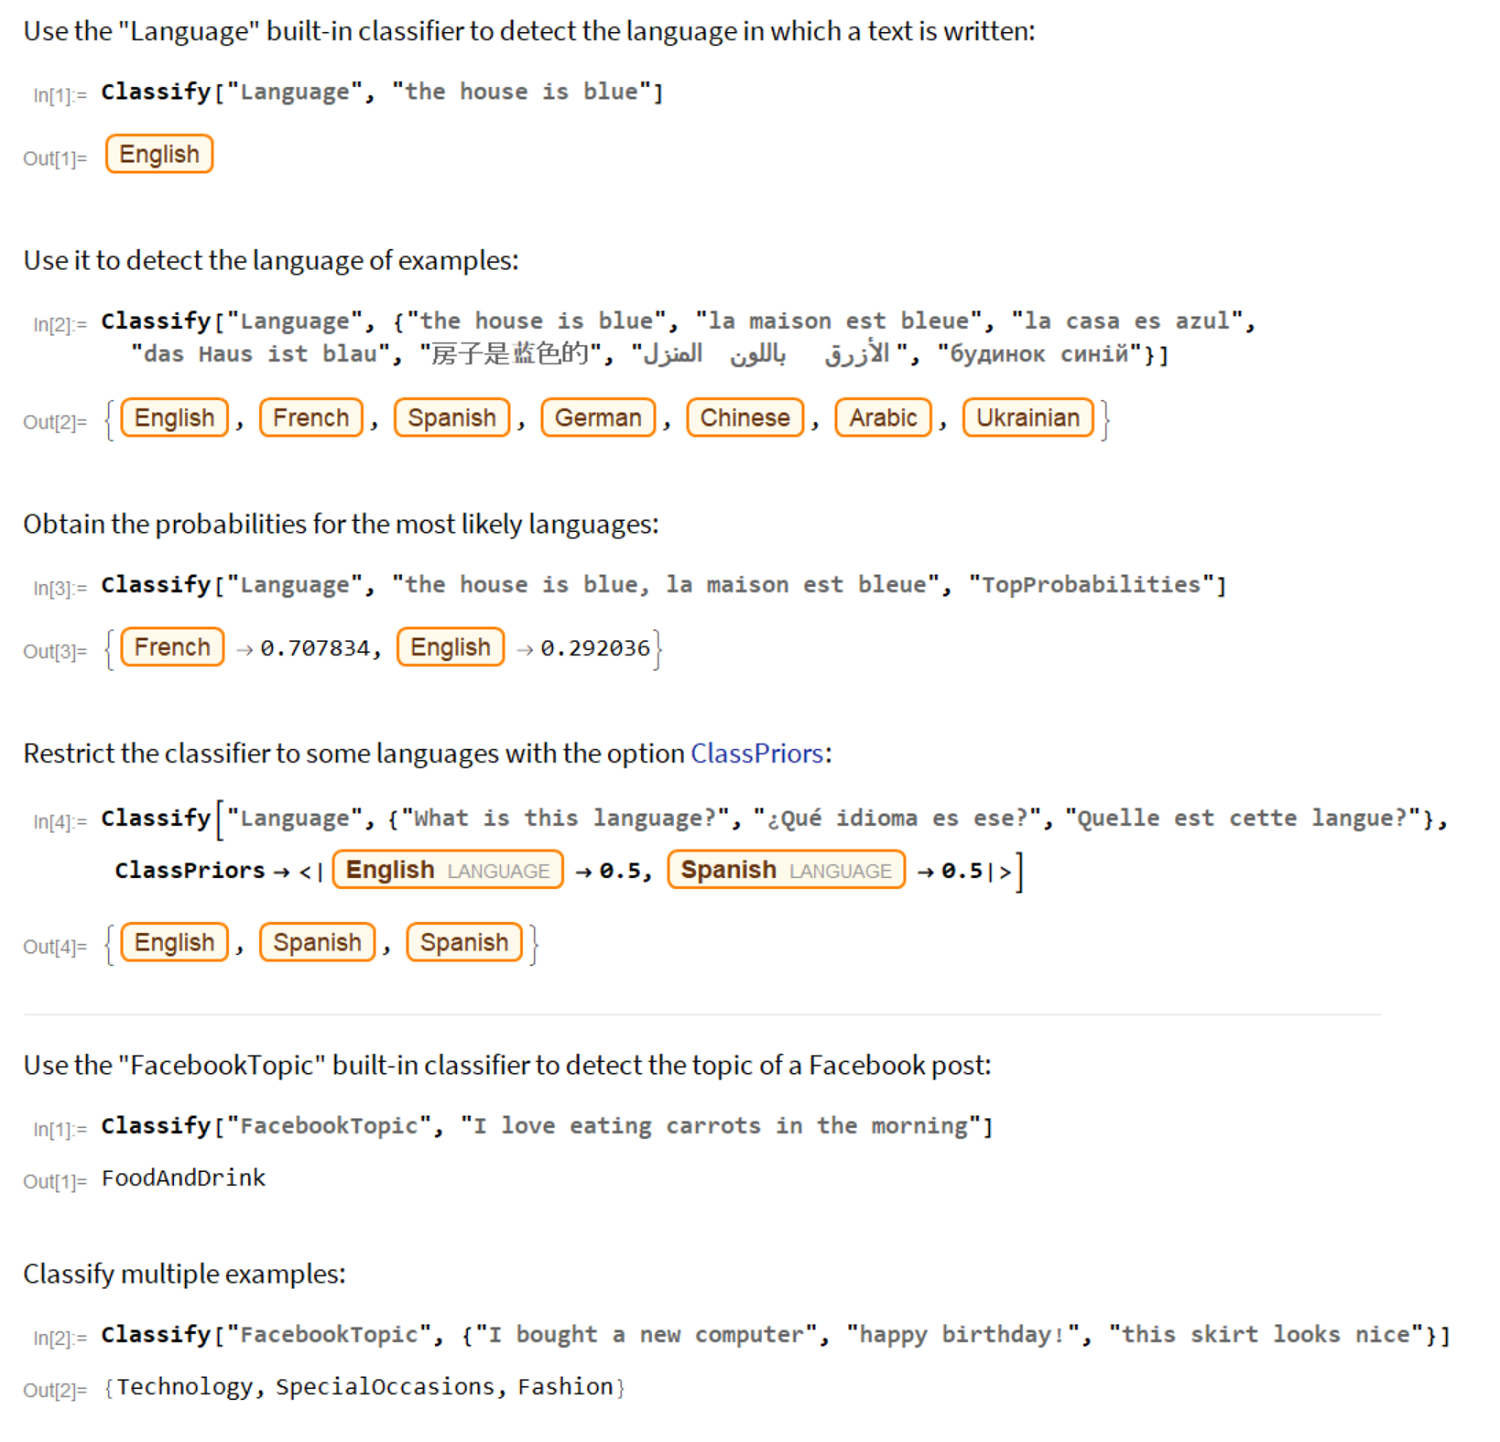

In [136]:
Image("mathematica_classifiers.png")

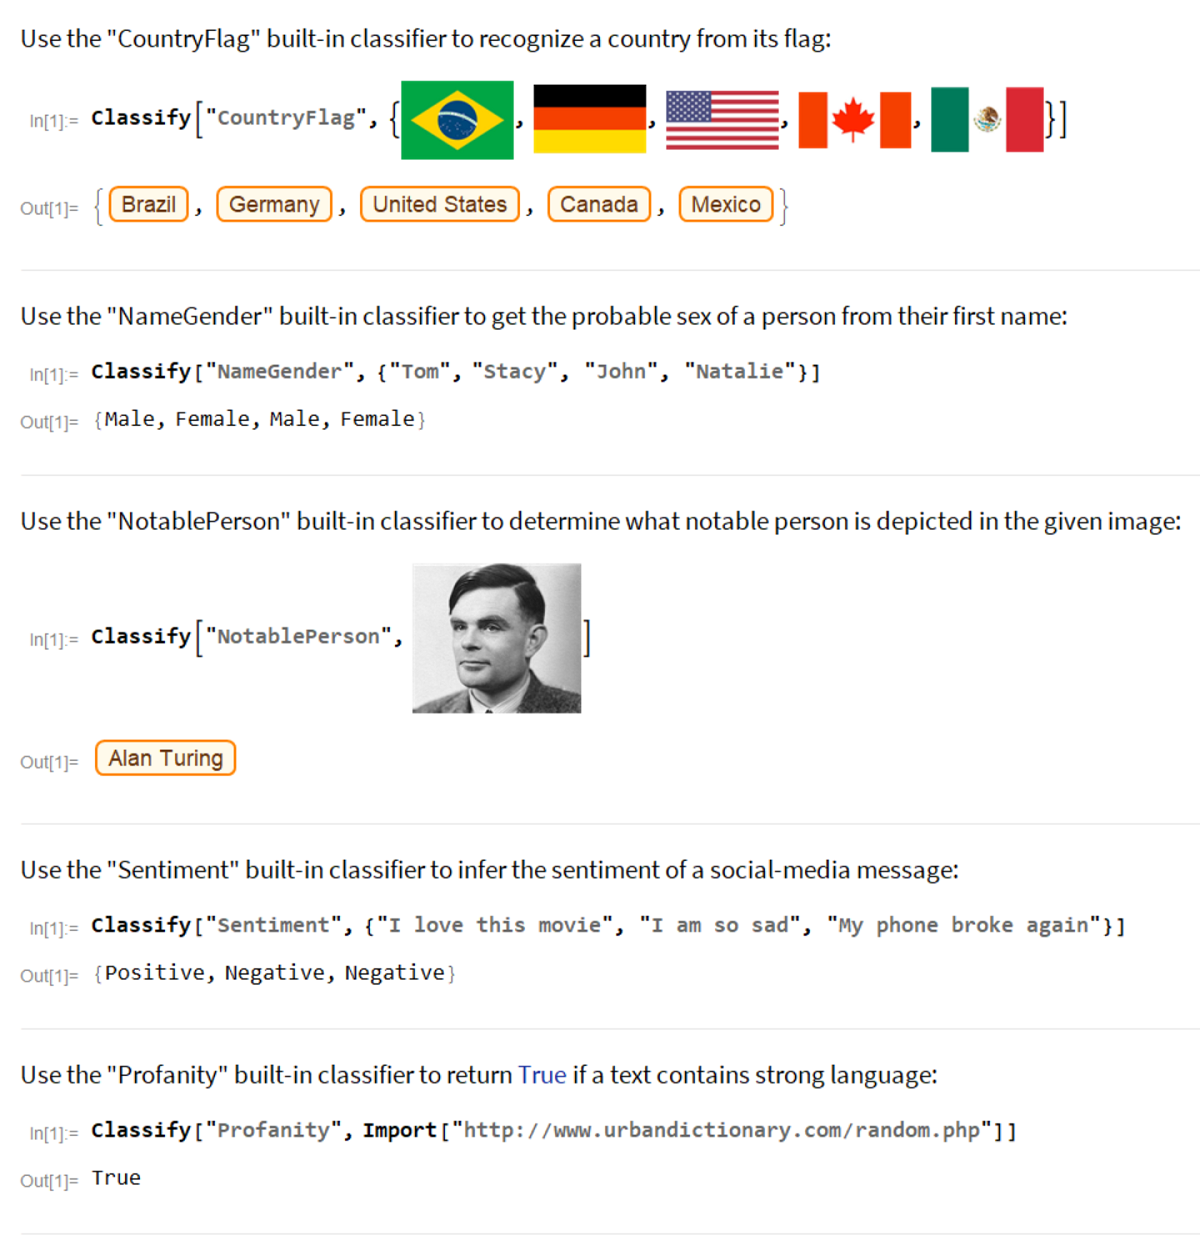

In [137]:
Image("mathematica_classifiers2.png")

## Requirements for ML

- Need a lot of data

 $$( (\mathbf{x}^{[1]}, \mathbf{y}^{[1]}), \dots, (\mathbf{x}^{[n]}, \mathbf{y}^{[n]}) ) .$$

- Need that there be a connection between the predictors and the category. E.g. we hope that 

$$\mathbf{x}^{[i]} \overset{\mathrm{i.i.d.}}{\sim} f_{\mathbf{X}} \text{ and } \mathbf{y}^{[i]} = f^*(\mathbf{x}^{[i]})$$

some true function $f^*$, for $i=1,\dots,n$.

- Need a class of functions to search inside 

$$f(\,\cdot\,; \boldsymbol{\beta}) \text { for } \boldsymbol{\beta} \in \mathbb{R}^{P}$$

which is flexible ($f^*(\,\cdot\,) \approx f(\,\cdot\,; \boldsymbol{\beta}^*)$ for some $\boldsymbol{\beta}^* \in \mathbb{R}^{P}$) and efficient (evaluating $f(\mathbf{x}; \boldsymbol{\beta})$ is fast/simple).

- Need to be able to numerically rate how badly some $\boldsymbol{\beta}$ is for our purposes. This is the _loss function_ $L(\boldsymbol{\beta})$.   
  
- Need to be able to run optimize the loss function quickly. We take

$$ \DeclareMathOperator*{\argmin}{arg\,min}
f(\,\cdot\,; \boldsymbol{\beta}^*) \text{ where } \boldsymbol{\beta}^* = \argmin_{\boldsymbol{\beta} \in \mathbb{R}^{P}} L(\boldsymbol{\beta}) .$$



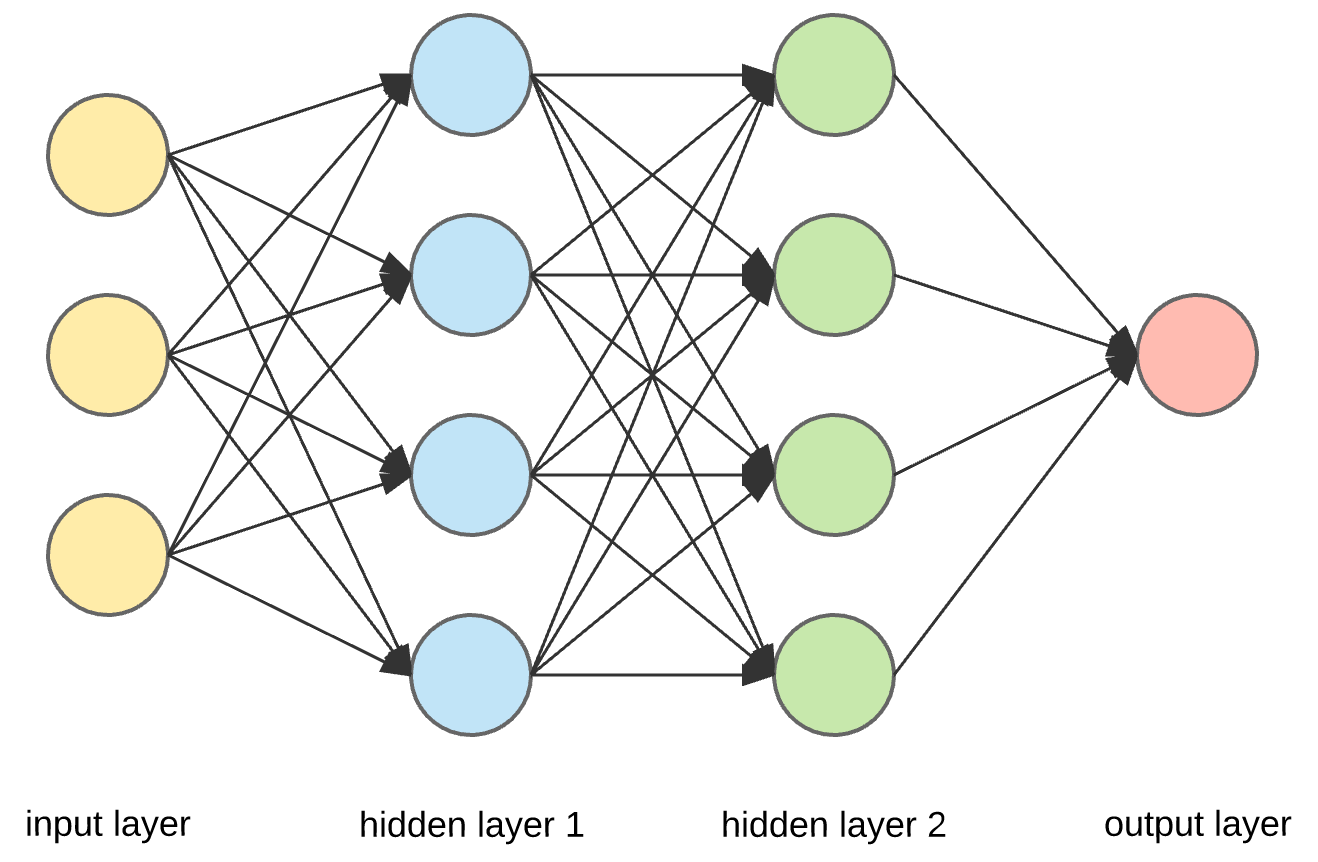

In [138]:
Image("multi-layer.png")

<sub>https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6</sub>

## A class of functions: neural networks

Example:

    neural_network <- function(x1, x2, x3, beta) {
    
        # Pull out all the parameters for the NN.
        w10 <- beta[1]; w11 <- beta[2]; ...
    
        # First layer
        a1 <- w10 + w11*x1 + w12*x2 + w13*x3
        if (a1 < 0) {
            a1 <- 0
        }
        
        a2 <- w20 + w21*x1 + w22*x2 + w23*x3
        if (a2 < 0) {
            a2 <- 0
        }
        
        # Output layer
        o <- wout0 + wout1 * a1 + wout2 * a2
        
        return( o )
    }
    
__They are very fast to evaluate (when coded properly)!__

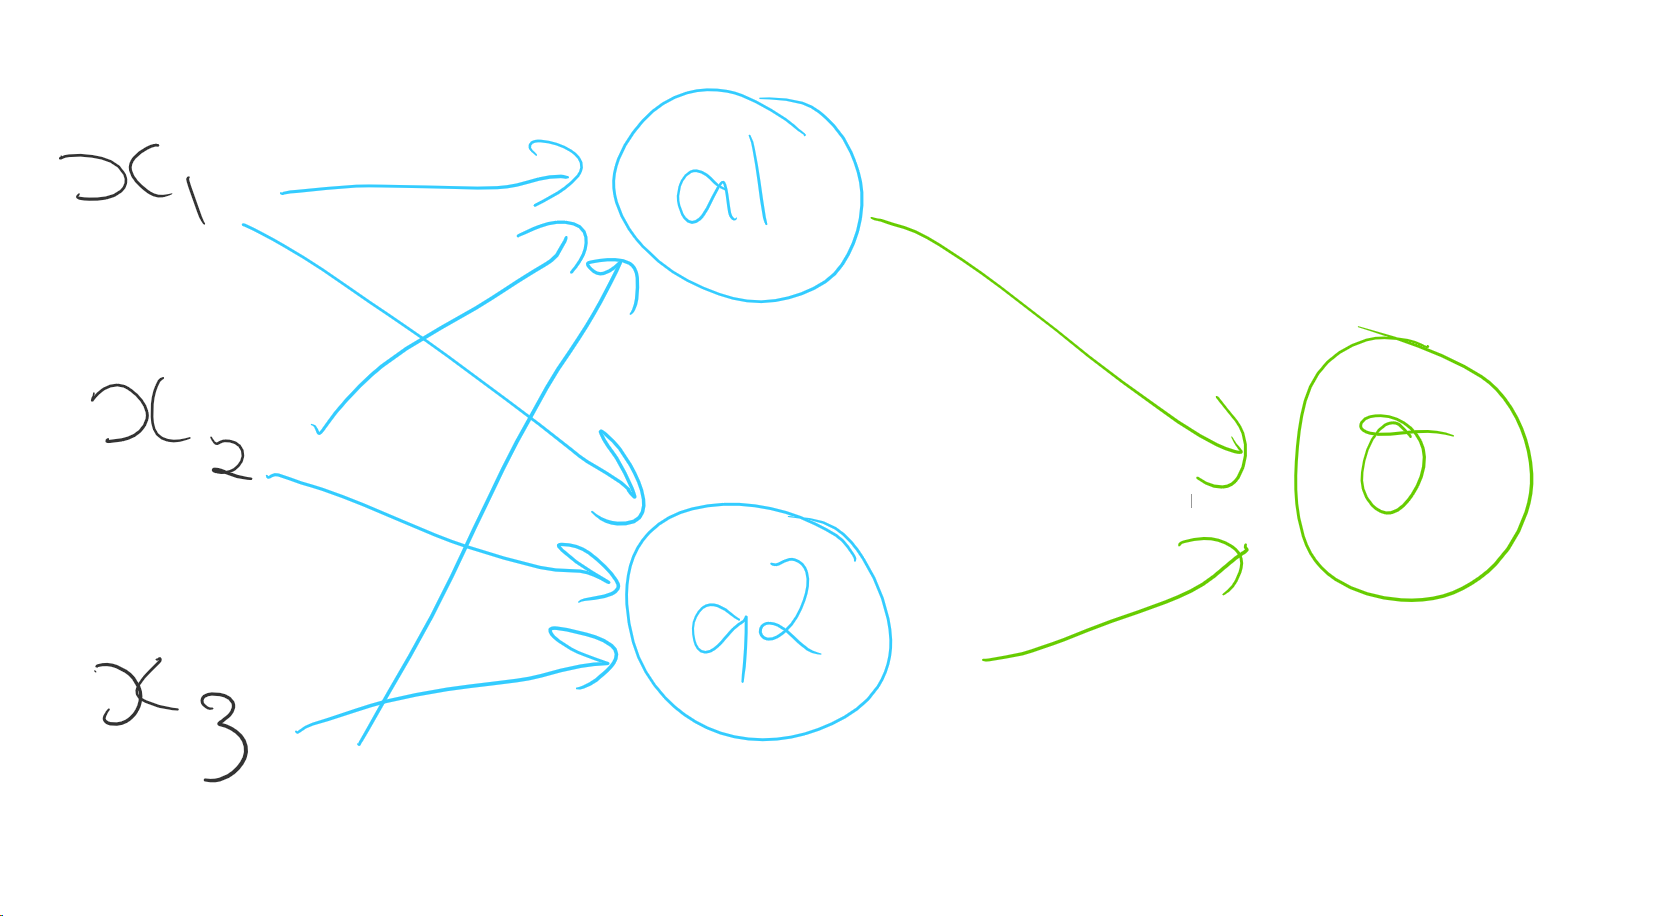

In [5]:
Image("nn.png")

## They are definitely flexible

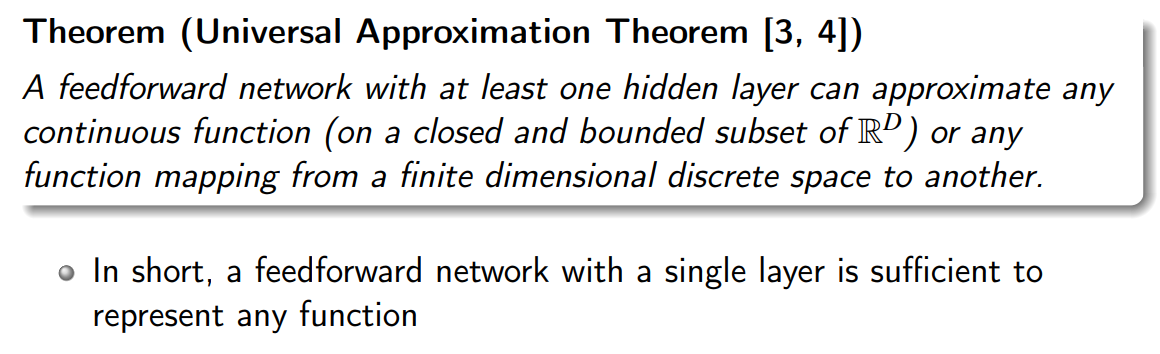

In [8]:
Image("universal_function.png") # from https://nthu-datalab.github.io/ml/slides/10_NN_Design.pdf

<sub>https://nthu-datalab.github.io/ml/slides/10_NN_Design.pdf</sub>

## Turning classification into a regression problem

In classification, instead of $y \in \mathbb{R}$ we have $y \in \{\text{True}, \text{False}\}$, or $y \in \{ \text{Group 1}, \dots, \text{Group }K \}$. 

_This is gross, let's turn it into a real-valued problem again_, i.e., a regression problem.

$$ y^{[1]} = \text{False}, y^{[2]} = \text{True}, \dots $$

$$ \Rightarrow \mathbf{y}^{[1]} = (1, 0), \mathbf{y}^{[2]} = (0, 1), \dots $$

ML people call this a _one-hot vector_, but better to think of

$$ \mathbf{y}=(y_1,\dots,y_K) \text{ where } y_k = \hat{\mathbb{P}}( \mathbf{x} \text{ belongs to category } k ) .$$

Normally, if a NN gives an output $\mathbf{o}=(o_1,\dots,o_K)$ then they won't make sense as a probability; need

$$ o_k \ge 0 \text{ for } k=1,\dots,K \text{ and } \sum_{k=1}^K o_k = 1 .$$

But we can make any vector satisfy this by

$$ \begin{aligned}
(\tilde{o}_1, \dots, \tilde{o}_K)
&\hookrightarrow (\exp\{\tilde{o}_1\}, \dots, \exp\{\tilde{o}_K\}) \\
&\hookrightarrow \Bigl(\frac{ \exp\{\tilde{o}_1\} }{ \sum_{k=1}^K \exp\{\tilde{o}_k\} } , \dots, \frac{ \exp\{\tilde{o}_K\} }{ \sum_{k=1}^K \exp\{\tilde{o}_k\} }\Bigr) \\
\end{aligned}
$$

so-called _soft-max_ function.


## Loss function for classification

Each training point $\mathbf{x}^{[i]}$ we get a distribution of the predicted category $f(\mathbf{x}^{[i]}; \boldsymbol{\beta})$ and the true category $\mathbf{y}^{[i]}$ (a degenerate distribution). What's the difference between these two distributions?

$$ \mathrm{CE}(f, g) = -\int f(x) \log \bigl[ g(x) \bigr]  \, \mathrm{d} x 
\Rightarrow \mathrm{CE}(p, q) = -\sum_{k=1}^K p_i \log \bigl[ q_i \bigr] $$

$$ \mathrm{CE}(\mathbf{y}^{[i]}, f(\mathbf{x}^{[i]}; \boldsymbol{\beta})) =  -\sum_{k=1}^K y^{[i]}_k \log\bigl( f(\mathbf{x}^{[i]}; \boldsymbol{\beta})_k \bigr)  .$$

$$ \Rightarrow L(\boldsymbol{\beta}) = - \sum_{i=1}^n \sum_{k=1}^K y^{[i]}_k \log\bigl( f(\mathbf{x}^{[i]}; \boldsymbol{\beta})_k \bigr) . $$

## Specialised loss functions

- Image colourisation
- Neural style transfer https://pat-laub.github.io/2018/01/07/neural-style-transfer.html
- Filling in parts of an image which have been masked
- Word embeddings ("king + woman - man = queen")

## Minimising a function with & without gradients

Find $\min_x f(x)$ by seeing the function as a computer would see it (blind). 

In [12]:
import ipywidgets
from ipywidgets import interactive_output, FloatSlider, Checkbox, HBox

f = lambda x: (1/100)**2 * (x**2) * np.sin(x/5)
fDash = lambda x: 2 * (1/100)**2 *(x/100) * np.sin(x/5) + (1/5) * (x/100)**2 * np.cos(x/5)

xRange = (0, 100)
xGrid = np.linspace(xRange[0], xRange[1], 200)
yGrid = f(xGrid)

xs = []
ys = []
yDashs = []

eps = 5

def update(x, showDerivs, showFunction):
    global xs, ys, yDashs
    
    if x == 0:
        return
    
    plt.figure(2)
    
    xs.append(x)
    ys.append(f(x))
    yDashs.append(fDash(x))
    
    plt.scatter(xs, ys)

    if showFunction:
        plt.plot(xGrid, yGrid, "--")
    
    if showDerivs:
        for i in range(len(xs)):
            plt.plot([xs[i]-eps/2, xs[i]+eps/2], [ys[i]-yDashs[i]*eps/2, ys[i]+yDashs[i]*eps/2], "--")
    
    plt.show()


w1=FloatSlider(min=xRange[0], max=xRange[1], step=0.01, continuous_update=False)
w2=Checkbox(description='Show derivatives')
w3=Checkbox(description='Reveal function');

In [10]:
display(HBox((w1,w2,w3)))
interactive_output(update, {"x": w1, "showDerivs": w2, "showFunction": w3})

Output()

## Traditional gradient descent (a.k.a. hill climbing)

_Input_: objective function $f(x)$, derivative function $f'(x)$, starting point $x_0$, and some learning rate $\eta > 0$. 

For $\mathrm{iteration} = 1, \dots, \mathrm{MaxIterations}$:  
$\quad$ Calculate the derivative $\nabla \gets f'(x)$  
$\quad$ Update our point to go some distance downhill: $x \gets x - \eta \nabla$



In [16]:
from ipywidgets import ToggleButton

xs = []
ys = []
yDashs = []

eps = 1
eta = 25

firstIteration = True

def update(x, showFunction, go):
    global xs, ys, yDashs, firstIteration
    
    if firstIteration:
        firstIteration = False
        return

    plt.figure(2)
    
    if showFunction:
        plt.plot(xGrid, yGrid, "--")
        
    if len(xs) > 0:
        x = xs[-1] - eta*fDash(xs[-1])

    xs.append(x)
    ys.append(f(x))
    yDashs.append(fDash(x))
 
    plt.scatter(xs, ys)

    for i in range(len(xs)):
        plt.plot([xs[i]-eps, xs[i]+eps], [ys[i]-yDashs[i]*eps, ys[i]+yDashs[i]*eps], "--")
     
    plt.show()

w1=FloatSlider(min=xRange[0], max=xRange[1], step=0.01, value=50, continuous_update=False)
w2=Checkbox(description='Reveal function')
w3=ToggleButton(description='Update')

In [17]:
display(HBox((w1,w2,w3)))
interactive_output(update, {"x": w1, "showFunction": w2, "go": w3})

Output()

## Minimising loss function over neural networks with stochastic gradient descent

Replace $f(x)$ with $L(\boldsymbol{\beta})$. 

_Input_: predictors $\mathbf{X} = (\mathbf{x}_1, \dots, \mathbf{x}_n)$ and true classifications $\mathbf{Y} = (\mathbf{y}_1, \dots, \mathbf{y}_n)$, some initial values for  the $\boldsymbol{\beta}$ parameters (__important!!__), and some learning rate $\eta > 0$. 

For $\mathrm{iteration} = 1, \dots, \mathrm{MaxIterations}$:   
$\quad$ (Optional) Randomly shuffle the data inside $\mathbf{X}$, $\mathbf{Y}$  
$\quad$ For $i = 1, \dots, n$:  
$\quad$ $\quad$ Make a prediction $\hat{\mathbf{y}}_i \gets f(\mathbf{x}_i; \boldsymbol{\beta})$  
$\quad$ $\quad$ Calculate the loss $L(\boldsymbol{\beta} \mid \hat{\mathbf{y}}_i, \mathbf{y}_i)$ based on prediction $\hat{\mathbf{y}}_i$ and real value $\mathbf{y}_i$   
$\quad$ $\quad$ For $p = 1,\dots,P$:  
$\quad$ $\quad$ $\quad$ Find $\nabla_p \gets (\mathrm{d} / \mathrm{d}\beta_p) \, L(\boldsymbol{\beta} \mid \hat{\mathbf{y}}_i, \mathbf{y}_i) $  
$\quad$ $\quad$ Create the derivative vector $\boldsymbol{\nabla}_{[i]} = (\nabla_1, \dots, \nabla_P)$  
$\quad$ $\quad$ _Finally_ update the parameters $\boldsymbol{\beta} \gets \boldsymbol{\beta} - \eta \boldsymbol{\nabla}_{[i]}$

__Problem__: Typically run for $\ge 10^3$ iterations, have $P \ge 10^6$ parameters, and $n \ge 10^6$ data points... So we have to calculate $\nabla_p$ at least $10^{15}$ times??

## Back propagation (a.k.a. automatic differentiation)

_Input_: predictors $\mathbf{X} = (\mathbf{x}_1, \dots, \mathbf{x}_n)$ and true classifications $\mathbf{Y} = (\mathbf{y}_1, \dots, \mathbf{y}_n)$, some initial values for  the $\boldsymbol{\beta}$ parameters, and some learning rate $\eta > 0$. 

For $\mathrm{iteration} = 1, \dots, \mathrm{MaxIterations} $:   
$\quad$ (Optional) Randomly shuffle the data inside $\mathbf{X}$, $\mathbf{Y}$  
$\quad$ For $i = 1, \dots, n$:  
$\quad$ $\quad$ Make a prediction $\hat{\mathbf{y}}_i \gets f(\mathbf{x}_i; \boldsymbol{\beta})$  
$\quad$ $\quad$ Calculate the loss $L(\boldsymbol{\beta} \mid \hat{\mathbf{y}}_i, \mathbf{y}_i)$ based on prediction $\hat{\mathbf{y}}_i$ and real value $\mathbf{y}_i$   
$\quad$ $\quad$ Get all derivatives $\boldsymbol{\nabla}_{[i]} \gets \bigl( (\mathrm{d} / \mathrm{d}\beta_1) \, L(\boldsymbol{\beta}), \dots, (\mathrm{d} / \mathrm{d}\beta_p) \, L(\boldsymbol{\beta}) \bigr) $ at once by _back propagation_  
$\quad$ $\quad$ Finally update the parameters $\boldsymbol{\beta} \gets \boldsymbol{\beta} - \eta \boldsymbol{\nabla}_{[i]}$

How does it work? Lots of the chain rule. Check out https://arxiv.org/abs/1502.05767 for all the details.

## Mini-batch gradient descent

_Input_: predictors $\mathbf{X} = (\mathbf{x}_1, \dots, \mathbf{x}_n)$ and true classifications $\mathbf{Y} = (\mathbf{y}_1, \dots, \mathbf{y}_n)$, some initial values for  the $\boldsymbol{\beta}$ parameters, and some learning rate $\eta > 0$. Also, choose some _mini batch size_, e.g., $B = 10^3$.   
     
For $\mathrm{iteration} = 1, \dots, \mathrm{MaxIterations}$:   
$\quad$ (Optional) Randomly shuffle the data inside $\mathbf{X}$, $\mathbf{Y}$  
$\quad$ Split the $n$ data points into batches of size $B$  
$\quad$ For each batch $b = 1, \dots, B$:  
$\quad$ $\quad$ Make the predictions $\hat{\mathbf{y}}_i \gets f(\mathbf{x}_i; \boldsymbol{\beta})$ for all the samples in batch $b$ in parallel   
$\quad$ $\quad$ Calculate the loss for each sample in the batch in parallel  
$\quad$ $\quad$ Get derivative vector $\boldsymbol{\nabla}_{[i]}$ for each sample in batch $b$ in parallel using back propagation  
$\quad$ $\quad$ Average out these gradients to get $\boldsymbol{\nabla}_{b}$  
$\quad$ $\quad$ Update the parameters $\boldsymbol{\beta} \gets \boldsymbol{\beta} - \eta \boldsymbol{\nabla}_{b}$  

With GPUs, parallel work becomes easy.

## Modern ML vs Old ML

Previously, spent a lot of time in pre-processing the input using expert domain knowledge.

Examples:
- In facial recognition, the distance between facial features (e.g. between eyes) and their ratios was deemed essential by computer vision experts, so they made specialised programs to calculate these numbers. See https://youtu.be/cunJJSxPMHA
- E.g. in my speaker recognition project, I translated voices into their spectral densities, and truncated the spectrums based on knowledge of human speech compression (e.g. over phone lines). https://pat-laub.github.io/2017/12/14/voice-classification.html

Nowadays, a tendency to throw the raw data into a very deep network and let it figure out the best pre-processing steps. Called _end-to-end learning_.

## Previously, worried about overfitting

Now, using a proper _train/validation/test split_ of the data and _regularisation_ it isn't such a problem.

Regularisation is the idea that we should penalise complexity of the model. A super simple way is _lasso regularisation_, which adds a term to our loss function:

$$ \Rightarrow L(\boldsymbol{\beta}; \lambda) = - \sum_{i=1}^n \sum_{k=1}^K y^{[i]}_k \log\bigl( f(\mathbf{x}^{[i]}; \boldsymbol{\beta})_k \bigr)  + \lambda \sum_{p=1}^P | \beta_p | .$$

What does this do? As $\lambda \nearrow \infty$, many $\beta_p$ parameters become 0, so the neural network becomes simpler (it has less connections).